# Data analysis

**Overview of the Lecture**

1. Data analysis with CSV files

2. Data analysis with JSON files




## Data analysis with CSV files

What is a csv file?

**CSV** - csv stands for Comma Separated Values. These comma-separated values file use a comma as a delimiter i.e. a comma is used to separate values.

The csv library is custom built for csv files. Key functions are: `reading and writing`


### Recap reading csv files

In [1]:
# Importing the library CSV
import csv

In [9]:
csv_file_path = "sample_data/california_housing_train.csv"

In [3]:
# This code prints the first line of the CSV file

with open(csv_file_path) as csvfile:
    print(csvfile.readline())

"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"



In [4]:
# Print OrderedDict from first row of CSV file 
with open(csv_file_path) as csvfile:
    reader = csv.DictReader(csvfile)
    print(next(reader))

{'longitude': '-114.310000', 'latitude': '34.190000', 'housing_median_age': '15.000000', 'total_rooms': '5612.000000', 'total_bedrooms': '1283.000000', 'population': '1015.000000', 'households': '472.000000', 'median_income': '1.493600', 'median_house_value': '66900.000000'}


In [5]:
houses = [] # List to store entries

with open(csv_file_path) as csvfile:
    reader = csv.DictReader(csvfile) # using dict reader to read from a file
    for row in reader:
        houses.append(row)

In [6]:
houses[0] # Reading the first entry on the csv file

{'longitude': '-114.310000',
 'latitude': '34.190000',
 'housing_median_age': '15.000000',
 'total_rooms': '5612.000000',
 'total_bedrooms': '1283.000000',
 'population': '1015.000000',
 'households': '472.000000',
 'median_income': '1.493600',
 'median_house_value': '66900.000000'}

### Writing csv files

In [ ]:
# Random library is used to generate random date points
import random
# Datetime library for manipulation of date
import datetime

In [10]:
data = [['Name', 'DOB', 'Grade', 'Attitude']] # list to store the column names

# Loop to generate data
for i in range(150):
    name = "Student " + str(i+1)
    dob = datetime.date(random.randint(1980, 2000), random.randint(1, 12), random.randint(1, 28)).strftime("%d/%m/%Y")
    grade = random.randint(0, 100)
    attitude = random.choice(['Positive', 'Negative'])
    data.append([name, dob, grade, attitude])

print(data)

[['Name', 'DOB', 'Grade', 'Attitude'], ['Student 1', '05/11/1984', 7, 'Negative'], ['Student 2', '23/02/1994', 72, 'Positive'], ['Student 3', '23/07/1986', 82, 'Positive'], ['Student 4', '19/10/1994', 22, 'Positive'], ['Student 5', '14/10/1981', 88, 'Negative'], ['Student 6', '27/04/1992', 7, 'Positive'], ['Student 7', '19/08/1991', 16, 'Positive'], ['Student 8', '26/02/1982', 82, 'Positive'], ['Student 9', '05/01/1994', 29, 'Negative'], ['Student 10', '05/09/1985', 12, 'Negative'], ['Student 11', '15/02/1999', 95, 'Positive'], ['Student 12', '16/04/1985', 8, 'Positive'], ['Student 13', '18/02/1996', 75, 'Positive'], ['Student 14', '22/10/1986', 47, 'Positive'], ['Student 15', '05/12/1997', 74, 'Negative'], ['Student 16', '23/05/1996', 1, 'Negative'], ['Student 17', '20/05/1980', 50, 'Negative'], ['Student 18', '02/07/1984', 37, 'Positive'], ['Student 19', '17/07/1991', 72, 'Negative'], ['Student 20', '17/01/1983', 62, 'Positive'], ['Student 21', '07/08/2000', 79, 'Positive'], ['Studen

In [11]:
# Using csv.writer to write a csv file
with open('data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

Open the file in the file explorer/file system.

The data will look something like this:

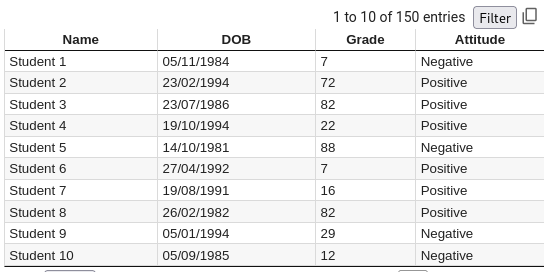

Neat!

In [12]:
# Reading the data we created
with open('data.csv', 'r') as file:
    reader = csv.reader(file)
    data = list(reader)

print(data)

[['Name', 'DOB', 'Grade', 'Attitude'], ['Student 1', '05/11/1984', '7', 'Negative'], ['Student 2', '23/02/1994', '72', 'Positive'], ['Student 3', '23/07/1986', '82', 'Positive'], ['Student 4', '19/10/1994', '22', 'Positive'], ['Student 5', '14/10/1981', '88', 'Negative'], ['Student 6', '27/04/1992', '7', 'Positive'], ['Student 7', '19/08/1991', '16', 'Positive'], ['Student 8', '26/02/1982', '82', 'Positive'], ['Student 9', '05/01/1994', '29', 'Negative'], ['Student 10', '05/09/1985', '12', 'Negative'], ['Student 11', '15/02/1999', '95', 'Positive'], ['Student 12', '16/04/1985', '8', 'Positive'], ['Student 13', '18/02/1996', '75', 'Positive'], ['Student 14', '22/10/1986', '47', 'Positive'], ['Student 15', '05/12/1997', '74', 'Negative'], ['Student 16', '23/05/1996', '1', 'Negative'], ['Student 17', '20/05/1980', '50', 'Negative'], ['Student 18', '02/07/1984', '37', 'Positive'], ['Student 19', '17/07/1991', '72', 'Negative'], ['Student 20', '17/01/1983', '62', 'Positive'], ['Student 21',

In [13]:
type(data)

list

![#f03c15](https://placehold.co/15x15/f03c15/f03c15.png) Say you want to add a column Month and Year to our list of list.

1. We can create the Month and Year column by adding them to the first list
2. For each of the list that contain data, we can then read the DOB data and extract month and year.


In [14]:
# Adding Month and Year to the column list
data[0].append('Month')
data[0].append('Year')
data[0]

['Name', 'DOB', 'Grade', 'Attitude', 'Month', 'Year']

In [15]:
#Process the student list to add numeric values for month and year to each entry
for st in data:
  if len(st) ==6: # Skips the list that stores column names
    pass
  else:
    dt = st[1] # # Save the date to a variable
    #print(dt)
    
    # Extract the year and month from the string
    st.append(dt[3:5])
    st.append(dt[-4:])

data # final data

[['Name', 'DOB', 'Grade', 'Attitude', 'Month', 'Year'],
 ['Student 1', '05/11/1984', '7', 'Negative', '11', '1984'],
 ['Student 2', '23/02/1994', '72', 'Positive', '02', '1994'],
 ['Student 3', '23/07/1986', '82', 'Positive', '07', '1986'],
 ['Student 4', '19/10/1994', '22', 'Positive', '10', '1994'],
 ['Student 5', '14/10/1981', '88', 'Negative', '10', '1981'],
 ['Student 6', '27/04/1992', '7', 'Positive', '04', '1992'],
 ['Student 7', '19/08/1991', '16', 'Positive', '08', '1991'],
 ['Student 8', '26/02/1982', '82', 'Positive', '02', '1982'],
 ['Student 9', '05/01/1994', '29', 'Negative', '01', '1994'],
 ['Student 10', '05/09/1985', '12', 'Negative', '09', '1985'],
 ['Student 11', '15/02/1999', '95', 'Positive', '02', '1999'],
 ['Student 12', '16/04/1985', '8', 'Positive', '04', '1985'],
 ['Student 13', '18/02/1996', '75', 'Positive', '02', '1996'],
 ['Student 14', '22/10/1986', '47', 'Positive', '10', '1986'],
 ['Student 15', '05/12/1997', '74', 'Negative', '12', '1997'],
 ['Student 



1.   What is the range of grades in class?
2.   How many students were born in 2000?
3.   What was the mean grade for students born in 2000?
4.   How many students scored above 80?



In [ ]:
# Solution: range of grades
years = [data[i][2] for i in range(1,len(data))]
max(years),min(years)

('99', '0')

In [16]:
# Solution: Number of students born in 2000
students2000 = [data[i][-1] for i in range(1,len(data)) if data[i][-1]=='2000']
print('Number of students born in 2000:', len(students2000)) 

Number of students born in 2000: 7


In [19]:
# Solution: Mean grade for students born in 2000
grades2000 = [int(data[i][2]) for i in range(1,len(data)) if data[i][-1]=='2000']
print('Mean grade for students born in 2000:', sum(grades2000)/len(students2000)) 

Mean grade for students born in 2000: 66.0


In [21]:
# Solution: Number of students who scored above 80
above80 = [data[i][2] for i in range(1,len(data)) if int(data[i][2])>80]
print('Number of students who scored above 80:', len(above80)) 

Number of students who scored above 80: 26


📓 Note: as with all programming, there are many ways to get these answers from the above data. See if you can come up with others.

# Data analysis with JSON files

JSON stands for JavaScript object Notation. A JSON file stores JSON text i.e. in syntax for storing and exchanging data.

The JSON Python library works with the JSON file format. The key functions are: `creating, loading and encoding data in json`.

In [23]:
# Loading needed libraries
import json
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict

In [27]:
# Reading the json file
with open('new_releases.json') as f:
    data = json.load(f)

In [28]:
## This will look messy
print(data)

{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20', 'items': [{'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'}, 'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i', 'id': '1RyvyyTE3xzB2ZywiAwp0i', 'name': 'Future', 'type': 'artist', 'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}], 'available_markets': ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'US', 'UY', 'VN', 'ZA'], 'external_urls': {'spotify': 'https://open.spotify.com/album/4bNPOFOzxGhF5jhfIK6lit'}, 'href'

It looks messy as the json loads data into a dictionary of dictionaries; having a similar structure.  

![link text](https://pynative.com/wp-content/uploads/2020/01/developer_json_file.jpg)

In [29]:
type(data)

dict

To read this json data, one has to study the keys of all these dictionaries.

**Level 1:**

In [30]:
data.keys()

dict_keys(['albums'])

In [31]:
type(data['albums'])

dict

**Level 2:**

In [32]:
data['albums'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [33]:
for key, value in data['albums'].items():
    print(key, type(value))

href <class 'str'>
items <class 'list'>
limit <class 'int'>
next <class 'str'>
offset <class 'int'>
previous <class 'NoneType'>
total <class 'int'>


Checking the other levels, we see different data structures.

In [34]:
type(data['albums']['items'])

list

In [35]:
data['albums']['items'][0]

{'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
   'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
   'id': '1RyvyyTE3xzB2ZywiAwp0i',
   'name': 'Future',
   'type': 'artist',
   'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
 'available_markets': ['AD',
  'AE',
  'AR',
  'AT',
  'AU',
  'BE',
  'BG',
  'BH',
  'BO',
  'BR',
  'CA',
  'CH',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DE',
  'DK',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'FI',
  'FR',
  'GB',
  'GR',
  'GT',
  'HK',
  'HN',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IS',
  'IT',
  'JO',
  'JP',
  'KW',
  'LB',
  'LI',
  'LT',
  'LU',
  'LV',
  'MA',
  'MC',
  'MT',
  'MX',
  'MY',
  'NI',
  'NL',
  'NO',
  'NZ',
  'OM',
  'PA',
  'PE',
  'PH',
  'PL',
  'PS',
  'PT',
  'PY',
  'QA',
  'RO',
  'SA',
  'SE',
  'SG',
  'SK',
  'SV',
  'TH',
  'TN',
  'TR',
  'TW',
  'US',
  'UY',
  'VN',
  'ZA'],
 'external_urls': 

**We access values in a json dictionary as we would for nested lists or dictionaries in Python.**

In [ ]:
data['albums']['items'][0].keys() # Nesting keys.

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

In [ ]:
data['albums']['items'][0]['artists'][0]['name'] # Getting a value

'Future'

In [ ]:
data['albums']['items'][1]['artists'][0]['name'] # Getting another value

'Kygo'

![#f03c15](https://placehold.co/15x15/f03c15/f03c15.png) From the above example, can you list all the artists in this json dictionary?

In [39]:
# Solution
num = len(data['albums']['items'][0])

artists = [data['albums']['items'][i]['artists'][0]['name'] for i in range(num)]
artists

['Future',
 'Kygo',
 'Various Artists',
 'Katy Perry',
 'Polo G',
 'Jonas Brothers',
 'Charli XCX',
 'Tory Lanez',
 'Perfume Genius',
 'NAV',
 'Migos',
 'Lee Brice',
 'Tiësto']

**Challenge:**

What other questions can be answered with this dataset?